In [1]:
import numpy as np       # Numerical operations (arrays, matrices)
import pandas as pd       # Data manipulation (DataFrames)
!pip install tensorflow
import tensorflow          # Deep learning library
import seaborn as sns        # Data visualization library
sns.set_style("darkgrid")     # Set Seaborn plot style to darkgrid
import matplotlib.pyplot as plt # Plotting library for creating plots
from sklearn.model_selection import train_test_split  # Split datasets for training and testing

import os                                              # Operating system interactions 
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"               # Disable GPU usage by setting CUDA_VISIBLE_DEVICES to -1

from tensorflow.keras.models import Sequential           # Keras model for building neural networks
from tensorflow.keras.layers import Dense, LSTM, Dropout  # Keras layers for Dense (fully connected), LSTM, and Dropout layers

import plotly.express as px                               # Interactive plotting library

import torch                                              # PyTorch deep learning library
import torch.nn as nn 
import torch.optim as optim                               # Optimization algorithms for PyTorch (like Adam, SGD)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix  # Classification evaluation metrics
from torch.utils.data import DataLoader, TensorDataset      # PyTorch utilities for data loading and batching
from collections import Counter                              # For counting occurrences of items in an iterable
from sklearn.preprocessing import MinMaxScaler                  # Scaler for normalizing data (min-max scaling)
from sklearn.preprocessing import LabelEncoder                    # Encoder for converting categorical labels to numeric values
from sklearn.metrics import accuracy_score, classification_report 

from tqdm import tqdm                                                # Library for showing progress bars in loops




  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata (4.9 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.12.23-py2.py3-none-any.whl.metadata (876 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.68.1-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.7.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached ml_dtypes-0.4.1-cp312-cp312-win_amd64.whl.metadata (20 kB)
  Using

**lets know some information about our data !!!**




In [3]:
"""
This part reads a CSV file into a pandas DataFrame and displays the first few rows.
- pd.read_csv('network.csv'): Reads the our network.csv into  data DF
- data.head(): Displays the first 5 rows of the DataFrame by default, allowing for a quick preview of the data structure and content.
"""
data = pd.read_csv('network.csv')
data.head()


,Flow Duration,Total Fwd Packets,Fwd Packet Length Mean,Bwd Packet Length Mean,Flow IAT Mean,SYN Flag Count,FIN Flag Count,Active Mean,Idle Mean,Label
0,32046067,2,37.000000,0.000000,3.200000e+07,1,0,0.0,0.0,BENIGN
1,66073,4,44.000000,107.000000,9.439000e+03,0,0,0.0,0.0,BENIGN
2,60025,1,56.000000,112.000000,6.002500e+04,0,0,0.0,0.0,BENIGN
3,47619,1,44.000000,213.000000,4.761900e+04,0,0,0.0,0.0,BENIGN
4,99329635,6,53.333333,1656.428571,8.277470e+06,0,1,13973.0,99300000.0,DoS Hulk


In [4]:
"""
- data.shape: Returns a tuple representing the dimensions of the data DF.
  The first element is the number of rows, and the second element is the number of columns.
"""
data.shape

(1500000, 10)

In [5]:
"""
- data.info(): Provides a summary of the data DF.
  Includes details about:
    - The number of non-null values in each column.
    - The data type of each column.
    - The overall memory usage of the DataFrame.
"""
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500000 entries, 0 to 1499999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Flow Duration           1500000 non-null  int64  
 1   Total Fwd Packets       1500000 non-null  int64  
 2   Fwd Packet Length Mean  1500000 non-null  float64
 3   Bwd Packet Length Mean  1500000 non-null  float64
 4   Flow IAT Mean           1500000 non-null  float64
 5   SYN Flag Count          1500000 non-null  int64  
 6   FIN Flag Count          1500000 non-null  int64  
 7   Active Mean             1500000 non-null  float64
 8   Idle Mean               1500000 non-null  float64
 9   Label                   1500000 non-null  object 
dtypes: float64(5), int64(4), object(1)
memory usage: 114.4+ MB


<Axes: >

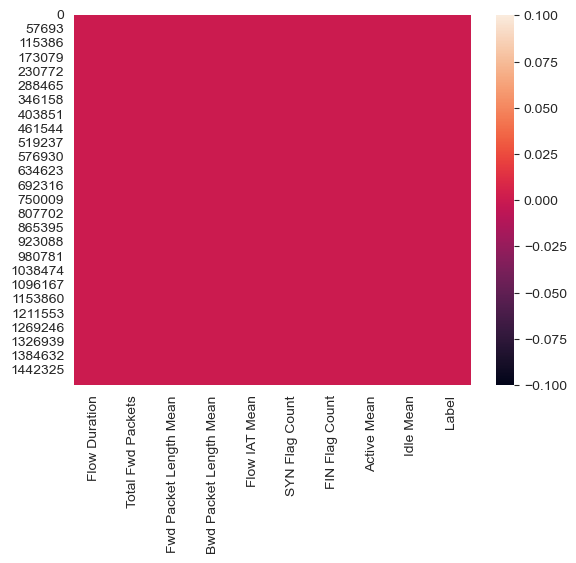

In [6]:
"""
- sns.heatmap(data.isnull()): Visualizes NaN values in the data  DF as a heatmap using the seaborn library.
  - Rows and columns are represented on the axes.
  - Cells with missing values are highlighted, making it easy to identify patterns of missing data.
"""
sns.heatmap(data.isnull())

In [7]:
"""
- data.duplicated().sum(): Checks for duplicate rows in the data DF and returns the total count of duplicate rows.
  - A duplicate row is one that has the same values across all columns as another row in the DataFrame.
"""
data.duplicated().sum()

510412

**NOW , Lets start preprocessing our data !!!**

In [9]:
"""
This part removes duplicate rows from the DataFrame data and retrieves the updated dimensions.

- data.drop_duplicates(inplace=True): Removes duplicate rows from the DataFrame data in place (( original DataFrame is updated)).
- data.shape: Returns the dimensions of the updated DataFrame as (number of rows, number of columns).

Note: This is useful for ensuring the data is clean and free of duplicate rows, which could affect analysis or modeling.
"""
data.drop_duplicates(inplace = True)
data.shape

(989588, 10)

In [10]:
"""
This script identifies numeric columns in the DataFrame data, checks for infinite values in those columns,
      and prints the count of infinite values per column if any exist.

- data.select_dtypes(include=np.number).columns: Selects the column names in the DataFrame data that contain numeric data types (integers and floats).
- np.isinf(data[numeric_cols]).sum(): Identifies infinite values (np.inf or -np.inf) in the selected numeric columns and sums them up for each column,
                                 returning the count of infinite values per column.
- inf_count[inf_count > 0]: Filters the resulting count to show only the columns with more than 0 infinite values.
- print(): Outputs the names of numeric columns with infinite values and their respective counts.

Note: This part is useful for detecting and analyzing the presence of infinite values in numeric columns, which canaffect data analysis and modeling.
"""
numeric_cols = data.select_dtypes(include = np.number).columns
inf_count = np.isinf(data[numeric_cols]).sum()
print(inf_count[inf_count > 0])

Series([], dtype: int64)


In [11]:
"""
This script calculates and displays the class distribution for a target column in the DataFrame data.

- Counter(data[target]): Counts the occurrences of each unique class in the target column using Python's Counter 
                             from the collections module.
-  The for loop: Iterates through the unique class labels and their counts  and Prints each class labeland its
                corresponding sample count in a formatted string.

Note: This part is useful for identifying class imbalances in classification tasks, which may require preprocessing techniques
        like oversampling or undersampling.
"""
target = "Label"    #Specifies the target column in the DataFrame whose class distribution will be analyzed.
class_distribution = Counter(data[target])

print("Class distribution before handling imbalance:")
for label, count in class_distribution.items():
    print(f"Class {label}: {count} samples")


Class distribution before handling imbalance:
Class BENIGN: 814922 samples
Class DoS Hulk: 89086 samples
Class FTP-Patator: 2297 samples
Class PortScan: 1088 samples
Class DDoS: 67693 samples
Class DoS Slowhttptest: 2765 samples
Class DoS slowloris: 2691 samples
Class Web Attack � XSS: 353 samples
Class Bot: 742 samples
Class DoS GoldenEye: 5465 samples
Class SSH-Patator: 1686 samples
Class Web Attack � Brute Force: 766 samples
Class Infiltration: 19 samples
Class Web Attack � Sql Injection: 11 samples
Class Heartbleed: 4 samples


In [12]:
"""
This script applies Min-Max scaling to numeric columns in the DataFrame data.

-  MinMaxScaler(): Initializes the MinMaxScaler, which scales the numeric values of the data to a specified range (default is [0, 1])
                              and its equation is x'=(x-min(x))/(max(x)-min(x)).
 - fit_transform(): Fits the scaler to the data and then transforms it, scaling all numeric values to the specified range.

### Purpose:
This process normalizes numeric data to bring all features to a uniform scale, which can improve the performance of
  machine learning algorithms by reducing bias caused by varying feature magnitudes.
"""
scaler = MinMaxScaler()
#Identifies all numeric columns in the DataFrame data by selecting columns with numeric data types (integers and floats).
num_columns = data.select_dtypes(include=np.number).columns
# Apply MinMaxScaler
data[num_columns] = scaler.fit_transform(data[num_columns])

In [13]:
data    ### this shows data after normalizing the numerical coloumns with the min max scaler to range[0,1] 

,Flow Duration,Total Fwd Packets,Fwd Packet Length Mean,Bwd Packet Length Mean,Flow IAT Mean,SYN Flag Count,FIN Flag Count,Active Mean,Idle Mean,Label
0,0.267051,0.000005,0.006230,0.000000,0.266667,1.0,0.0,0.000000,0.0000,BENIGN
1,0.000551,0.000014,0.007408,0.018447,0.000079,0.0,0.0,0.000000,0.0000,BENIGN
2,0.000500,0.000000,0.009429,0.019309,0.000500,0.0,0.0,0.000000,0.0000,BENIGN
3,0.000397,0.000000,0.007408,0.036721,0.000397,0.0,0.0,0.000000,0.0000,BENIGN
4,0.827747,0.000023,0.008980,0.285567,0.068979,0.0,1.0,0.000127,0.8275,DoS Hulk
...,...,...,...,...,...,...,...,...,...,...
1499991,0.000199,0.000005,0.006566,0.009482,0.000067,0.0,0.0,0.000000,0.0000,BENIGN
1499993,0.003346,0.000009,0.031990,0.000690,0.000669,0.0,0.0,0.000000,0.0000,BENIGN
1499994,0.006264,0.000037,0.013152,0.061907,0.000330,0.0,0.0,0.000000,0.0000,BENIGN
1499998,0.000259,0.000000,0.008924,0.024308,0.000259,0.0,0.0,0.000000,0.0000,BENIGN


In [14]:
"""
Label encoding is applied to the 'Label' column in the data DataFrame.
- LabelEncoder(): Initializes a LabelEncoder object from sklearn.preprocessing to convert categorical labels into numeric values.
- fit_transform() :first fits the encoder to the unique values in the Label column, and then transforms those values into numerical codes. Each unique
                 category is assigned a number starting from 0.
### Purpose:
The purpose of this transformation is to convert categorical labels into a numeric format, which is required for our model
"""
label_encoder = LabelEncoder()
data['Label'] = label_encoder.fit_transform(data['Label'])


In [15]:
data    ### This shows  data after applying label encoding to the "Label" column, converting categorical values into numeric labels.

,Flow Duration,Total Fwd Packets,Fwd Packet Length Mean,Bwd Packet Length Mean,Flow IAT Mean,SYN Flag Count,FIN Flag Count,Active Mean,Idle Mean,Label
0,0.267051,0.000005,0.006230,0.000000,0.266667,1.0,0.0,0.000000,0.0000,0
1,0.000551,0.000014,0.007408,0.018447,0.000079,0.0,0.0,0.000000,0.0000,0
2,0.000500,0.000000,0.009429,0.019309,0.000500,0.0,0.0,0.000000,0.0000,0
3,0.000397,0.000000,0.007408,0.036721,0.000397,0.0,0.0,0.000000,0.0000,0
4,0.827747,0.000023,0.008980,0.285567,0.068979,0.0,1.0,0.000127,0.8275,4
...,...,...,...,...,...,...,...,...,...,...
1499991,0.000199,0.000005,0.006566,0.009482,0.000067,0.0,0.0,0.000000,0.0000,0
1499993,0.003346,0.000009,0.031990,0.000690,0.000669,0.0,0.0,0.000000,0.0000,0
1499994,0.006264,0.000037,0.013152,0.061907,0.000330,0.0,0.0,0.000000,0.0000,0
1499998,0.000259,0.000000,0.008924,0.024308,0.000259,0.0,0.0,0.000000,0.0000,0


**Now prepare our data for the model by splitting it to train ,validation and test!!!**


In [17]:
"""
This code splits the dataset into features (X) and labels (y), performs a train-validation-test split, 
and converts the data into PyTorch tensors.

### Steps:
1. *Split data into features (X) and labels (y):*

2. *Train-Validation-Test Split:*
   - Splits the dataset into training and temporary(with 30% of data reserved for validation and testing).
   - Splits the temporary dataset into equal parts for validation and testing (50% for each).

### Purpose:
- The purpose of this code is to prepare the dataset for machine learning by separating features and labels, splitting the data into training, 
   validation, and test sets, and preparing the data for use in PyTorch models.
"""
##step 1
X = data.iloc[:, :-1].values  #Extracts all columns except the last one (which is assumed to be the 'Label' column) as the feature set X.
y = data['Label'].values    #Extracts the 'Label' column as the target variable y.

##step 2
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)   # 70% train  and 30%  in the temporary variables
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5,random_state=42) # this 30 % is then divided into 50% test and 50% validation




In [18]:
"""
This script prepares the training, validation, and test datasets for use with a PyTorch model. It performs the following tasks:

1. Selects the appropriate device Gpu if availble  else cpu for model training.
2. Converts the input features (X_train, X_val, X_test) and the target labels (y_train, y_val, y_test) into PyTorch tensors of 
    the appropriate data types and moves them to the selected device.
3. Creates DataLoader instances for the training, validation, and test datasets. The DataLoader helps in batching, shuffling, and loading the data 
      during training.
- The target labels (y_train, y_val, y_test) are assumed to be for a classification task and are therefore converted to long integer tensors.
"""
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')    
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.long).to(device)  # Use long for classification
y_val = torch.tensor(y_val, dtype=torch.long).to(device)
y_test = torch.tensor(y_test, dtype=torch.long).to(device)

# Create DataLoaders
batch_size = 64
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=batch_size, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val, y_val), batch_size=batch_size, shuffle=False)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=batch_size, shuffle=False)

**Finally , biuld our model !!!**

In [20]:
class LSTMModel(nn.Module):
    """
    A simple LSTM model for sequence classification.
    Args:
        input_size : The number of features in the input sequence.
        hidden_size: The number of features in the hidden state of the LSTM.
        num_classes: The number of output classes (for classification).
        num_layers : The number of LSTM layers (default is 2).
    Attributes:
        lstm (nn.LSTM): The LSTM layer for sequence processing.
        fc (nn.Linear): The fully connected layer for output classification.
    Methods:
        forward(x): Defines the forward pass of the model.
    """    
    def __init__(self, input_size, hidden_size, num_classes, num_layers=2):
        super(LSTMModel, self).__init__()
        # LSTM layer
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        #  fully connected layer
        self.fc = nn.Linear(hidden_size, num_classes)
    def forward(self, x):
        """
        Forward pass through the LSTM model.
        Args:
            x : Input tensor of shape (batch_size, seq_length, input_size).
        Returns:
            Tensor: Output tensor of shape (batch_size, num_classes).
        """
        # Add a dummy time dimension to input tensor. Shape becomes (batch_size, 1, seq_length, input_size)
        x = x.unsqueeze(1)
        # Pass input through LSTM layer. Output is a tuple (out, (h_n, c_n)), we discard (h_n, c_n) by using _
        out, _ = self.lstm(x)
        # Pass the output from the last time step (out[:, -1, :]) through the fully connected layer to get final predictions
        out = self.fc(out[:, -1, :])
        return out

# Instantiate the model
input_size = X_train.shape[1]  # The number of features in the input data
hidden_size = 64  # Number of hidden units in the LSTM layer
num_classes = len(np.unique(y))  # Number of unique labels (classes) in the dataset

# Create the model instance and move it to the appropriate device 
model = LSTMModel(input_size, hidden_size, num_classes).to(device)

In [21]:
# Loss Function
"""
Purpose:
    CrossEntropyLoss measures how different the model's predictions are from the true labels
    in classification tasks. It tells us how well our model is performing.

How it works:
    1. Takes the raw outputs from your model (called logits)
    2. Converts these outputs into probabilities using softmax
    3. Calculates how far these probabilities are from the correct answers
    4. Returns a single number where lower means better predictions
"""
criterion = nn.CrossEntropyLoss() ## multiclass classification


# Optimizer
"""
Purpose:
    Adam is an optimizer that updates the model's parameters to make better predictions
    over time. It's like a smart learning algorithm that figures out how to adjust
    each part of the model.

How it works:
    1. Looks at the current performance (loss) of the model
    2. Calculates how to change each parameter to reduce the loss
    3. Keeps track of past changes to make smarter updates
    4. Makes bigger updates for parameters that need more change
    5. Makes smaller updates for parameters that are already working well
"""

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


"\nPurpose:\n    Adam is an optimizer that updates the model's parameters to make better predictions\n    over time. It's like a smart learning algorithm that figures out how to adjust\n    each part of the model.\n\nHow it works:\n    1. Looks at the current performance (loss) of the model\n    2. Calculates how to change each parameter to reduce the loss\n    3. Keeps track of past changes to make smarter updates\n    4. Makes bigger updates for parameters that need more change\n    5. Makes smaller updates for parameters that are already working well\n"

In [22]:
# Training parameters
num_epochs = 10  # Set the number of epochs for training which is  number of times to iterate through the entire training dataset.
patience = 5  # Set the patience for early stopping (number of epochs to wait before stopping early if there is no improvement in validation loss.)
best_val_loss = float('inf')  # Initialize the best validation loss to infinity which will store best validation loss observed so far
epochs_no_improve = 0  # Initialize the counter for epochs without improvement in validation loss


# Training Loop
"""
This  trains our  model using a training loop.
It sets up training parameters, computes the loss, performs forward and backward passes, 
and updates the model's weights based on the gradients.

Parameters:
- model: The  model being trained.
- train_loader: A DataLoader that provides the training data in batches.
- optimizer: The optimizer used to update the model parameters .
- criterion: The loss function used to compute the error between predicted outputs and true labels.
* This part trains the model and updates its weights.
"""
for epoch in tqdm(range(num_epochs), desc="Training Epochs"):  # Loop over the number of epochs with a progress bar
    model.train()  # Set the model to training mode (enables dropout, batch normalization, etc.)
    train_loss = 0  # Initialize the variable to accumulate the training loss for the epoch
    # Loop through the training data loader in batches
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()  # Clear the previous gradients to prevent accumulation   ### gradient exploding تمنع ##
        outputs = model(X_batch)  # Pass the current batch of inputs (X_batch) through the model to get predictions   ##forward pass بتعمل##
        loss = criterion(outputs, y_batch)  # Compute the loss between predicted outputs and true labels (y_batch)
        train_loss += loss.item()  # Accumulate the loss for the current batch
        loss.backward()  # Backpropagate the gradients from the loss     ## gradients تحسب  ##
        optimizer.step()  # Update the model parameters based on the gradients
    train_loss /= len(train_loader)  # Calculate the average training loss for the epoch

    #validation phase
    """
    This code performs model evaluation on the validation set. 
    It computes the validation loss, accuracy, and implements early stopping to prevent overfitting.

    Key steps:
    1. Evaluates the model using the validation dataset.
    2. Calculates validation loss and accuracy.
    3. Implements early stopping based on validation loss.
    """
    # Set the model to evaluation mode (disables dropout, batchnorm, etc.)
    model.eval()

     # Initialize variables to track validation loss, predictions, and true labels
    val_loss = 0
    val_preds, val_labels = [], []

    # Disable gradient computation to save memory during validation
    with torch.no_grad():
        # Iterate over batches of validation data
        for X_batch, y_batch in val_loader:
             # Get the model's output for the current batch
             outputs = model(X_batch)
             # Compute the loss between the predictions and true labels
             loss = criterion(outputs, y_batch)
             # Accumulate the validation loss
             val_loss += loss.item()
             # Get the predicted class labels by taking the argmax across the output logits
             val_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
             # Store the true labels
             val_labels.extend(y_batch.cpu().numpy())

     # Calculate the average validation loss
    val_loss /= len(val_loader)
     # Calculate validation accuracy by comparing predictions to true labels
    val_accuracy = accuracy_score(val_labels, val_preds)
     # Print out the epoch, training loss, validation loss, and validation accuracy
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")
     # Early stopping logic
    if val_loss < best_val_loss:
         # Update the best validation loss and reset the counter
         best_val_loss = val_loss
         epochs_no_improve = 0
    else:
         # Increment the counter if validation loss has not improved
         epochs_no_improve += 1

     # If the validation loss hasn't improved for 'patience' epochs, stop early
    if epochs_no_improve >= patience:
         print(f"Early stopping at epoch {epoch+1}")
         break

Training Epochs:  10%|█         | 1/10 [00:52<07:56, 52.90s/it]

Epoch 1/10, Train Loss: 0.2650, Val Loss: 0.1605, Val Accuracy: 0.9585


Training Epochs:  20%|██        | 2/10 [01:46<07:07, 53.38s/it]

Epoch 2/10, Train Loss: 0.1439, Val Loss: 0.1178, Val Accuracy: 0.9645


Training Epochs:  30%|███       | 3/10 [02:39<06:10, 52.93s/it]

Epoch 3/10, Train Loss: 0.1029, Val Loss: 0.0872, Val Accuracy: 0.9724


Training Epochs:  40%|████      | 4/10 [03:30<05:13, 52.30s/it]

Epoch 4/10, Train Loss: 0.0854, Val Loss: 0.0784, Val Accuracy: 0.9749


Training Epochs:  50%|█████     | 5/10 [04:21<04:19, 51.89s/it]

Epoch 5/10, Train Loss: 0.0766, Val Loss: 0.0718, Val Accuracy: 0.9791


Training Epochs:  60%|██████    | 6/10 [05:13<03:27, 51.76s/it]

Epoch 6/10, Train Loss: 0.0695, Val Loss: 0.0623, Val Accuracy: 0.9826


Training Epochs:  70%|███████   | 7/10 [06:04<02:35, 51.82s/it]

Epoch 7/10, Train Loss: 0.0632, Val Loss: 0.0566, Val Accuracy: 0.9835


Training Epochs:  80%|████████  | 8/10 [06:40<01:33, 46.71s/it]

Epoch 8/10, Train Loss: 0.0586, Val Loss: 0.0571, Val Accuracy: 0.9833


Training Epochs:  90%|█████████ | 9/10 [07:17<00:43, 43.54s/it]

Epoch 9/10, Train Loss: 0.0550, Val Loss: 0.0532, Val Accuracy: 0.9838


Training Epochs: 100%|██████████| 10/10 [07:55<00:00, 47.52s/it]

Epoch 10/10, Train Loss: 0.0527, Val Loss: 0.0486, Val Accuracy: 0.9851


In [23]:
"""
Performs the model evaluation on the test dataset.

This phase evaluates the trained model on the test dataset to assess its performance 
in terms of accuracy and other classification metrics. It also generates a detailed 
classification report containing precision, recall, f1-score, and support for each class.

Parameters:
- model: The trained model to be evaluated.
- test_loader: DataLoader that provides the test data in batches.


- purpose: This part prints the accuracy and classification report for the test dataset.
"""
# Test phase
model.eval()  # Set the model to evaluation mode (disables dropout, batch normalization, etc.)
test_preds, test_labels = [], []  # Initialize empty lists to store predicted labels (test_preds) and true labels (test_labels)
# Disable gradient calculation during evaluation to save memory and computation
with torch.no_grad():
    # Loop through the test data loader in batches
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)  # Get model predictions for the current batch of test data
        # Extend the test_preds list with the predicted class labels (argmax of the output)
        test_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
        # Extend the test_labels list with the true labels from the current batch
        test_labels.extend(y_batch.cpu().numpy())

# Calculate the accuracy of the model on the test data by comparing predicted labels and true labels
test_accuracy = accuracy_score(test_labels, test_preds)
# Print the overall test accuracy
print(f"Test Accuracy: {test_accuracy:.4f}")
# Print a detailed classification report, which includes precision, recall, f1-score, and support for each class
print(classification_report(test_labels, test_preds))


Test Accuracy: 0.9849
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    122274
           1       0.00      0.00      0.00       129
           2       0.98      0.98      0.98     10165
           3       0.94      0.93      0.94       798
           4       1.00      0.93      0.96     13341
           5       0.89      0.84      0.87       400
           6       0.94      0.90      0.92       417
           7       0.99      0.92      0.95       331
           9       0.00      0.00      0.00         2
          10       1.00      0.10      0.18       168
          11       0.98      0.88      0.93       241
          12       1.00      0.03      0.06       120
          13       0.00      0.00      0.00         1
          14       1.00      0.04      0.07        52

    accuracy                           0.98    148439
   macro avg       0.76      0.54      0.56    148439
weighted avg       0.98      0.98      0.98    148439



C:\Users\fayrouz\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\fayrouz\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\fayrouz\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
